In [1]:
%matplotlib inline 

import numpy as np 
import scipy as sp 
import matplotlib as mpl # this actually imports matplotlib(just for quick acess)
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

# pandas presets
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## Basic pandas 
Next, we try to load some data from a csv into a pandas data frame

In [2]:
book_dataframe = pd.read_csv("../datasets/goodreads.csv", header=None, 
                             names=['rating', 'review_count', 'isbn', 
                                    'booktype','author_url', 'year', 
                                    'genre_urls', 'dir','rating_count', 
                                    'name'])

In [3]:
book_dataframe

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
5,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
6,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949.0,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
7,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964.0,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
8,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
9,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979.0,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...


In [4]:
book_dataframe.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

**The underlying data can be fetched**

In [5]:
book_dataframe.values  # this is just a numpy array

array([[4.4, '136455', '0439023483', ...,
        'dir01/2767052-the-hunger-games.html', '2958974',
        'The Hunger Games (The Hunger Games, #1)'],
       [4.41, '16648', '0439358078', ...,
        'dir01/2.Harry_Potter_and_the_Order_of_the_Phoenix.html',
        '1284478',
        'Harry Potter and the Order of the Phoenix (Harry Potter, #5)'],
       [3.56, '85746', '0316015849', ..., 'dir01/41865.Twilight.html',
        '2579564', 'Twilight (Twilight, #1)'],
       ..., 
       [3.78, '540', '1620612321', ..., 'dir60/13503247-flawed.html',
        '2971', 'Flawed'],
       [3.91, '281', nan, ..., 'dir60/2750008.html', '3083',
        '\xc3\x98\xc2\xa3\xc3\x98\xc2\xb3\xc3\x98\xc2\xb9\xc3\x98\xc2\xaf \xc3\x98\xc2\xa7\xc3\x99\xc2\x85\xc3\x98\xc2\xb1\xc3\x98\xc2\xa3\xc3\x98\xc2\xa9 \xc3\x99\xc2\x81\xc3\x99\xc2\x8a \xc3\x98\xc2\xa7\xc3\x99\xc2\x84\xc3\x98\xc2\xb9\xc3\x98\xc2\xa7\xc3\x99\xc2\x84\xc3\x99\xc2\x85'],
       [4.35, '61', '0786929081', ...,
        'dir60/66677.Legacy_of_t

**Columns are pretty much like numpy arrays**
They are called [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) and are indexable, and sliceable

In [6]:
book_dataframe.rating[1:10]  

1    4.41
2    3.56
3    4.23
4    4.23
5    4.25
6    4.22
7    4.38
8    3.79
9    4.18
Name: rating, dtype: float64

In [7]:
book_dataframe.rating.values #

array([ 4.4 ,  4.41,  3.56, ...,  3.78,  3.91,  4.35])

Boolean indexing works just like numpy

In [8]:
book_dataframe[book_dataframe.rating < 3]  # works just like numpy

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011.0,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


So does slicing

In [9]:
book_dataframe.rating.mean()

4.04220073357786

Pandas queries, similar to sql

In [10]:
book_dataframe.query("rating > 4 and rating < 4.5")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
5,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind
6,4.22,7205,0066238501,good_reads:book,https://www.goodreads.com/author/show/1069006....,1949.0,/genres/classics|/genres/young-adult|/genres/c...,dir01/11127.The_Chronicles_of_Narnia.html,286677,The Chronicles of Narnia (Chronicles of Narnia...
7,4.38,10902,0060256656,good_reads:book,https://www.goodreads.com/author/show/435477.S...,1964.0,/genres/childrens|/genres/young-adult|/genres/...,dir01/370493.The_Giving_Tree.html,502891,The Giving Tree
9,4.18,12302,0345391802,good_reads:book,https://www.goodreads.com/author/show/4.Dougla...,1979.0,/genres/science-fiction|/genres/humor|/genres/...,dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...
10,4.03,20937,0739326228,good_reads:book,https://www.goodreads.com/author/show/614.Arth...,1997.0,/genres/fiction|/genres/historical-fiction|/ge...,dir01/930.Memoirs_of_a_Geisha.html,1042679,Memoirs of a Geisha
12,4.36,69524,0375831002,good_reads:book,https://www.goodreads.com/author/show/11466.Ma...,2005.0,/genres/historical-fiction|/genres/young-adult...,dir01/19063.The_Book_Thief.html,675431,The Book Thief


Other types of filering

In [11]:
book_dataframe.year.notnull()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
5970    True
5971    True
5972    True
5973    True
5974    True
5975    True
5976    True
5977    True
5978    True
5979    True
5980    True
5981    True
5982    True
5983    True
5984    True
5985    True
5986    True
5987    True
5988    True
5989    True
5990    True
5991    True
5992    True
5993    True
5994    True
5995    True
5996    True
5997    True
5998    True
5999    True
Name: year, dtype: bool

## Cleaning the data
We try to remove all rows for which the year is null, as they cannno tbe converted to int.

**BIG FUCKING CAVEAT** NaN is not convertible to int. Only float and object types support it.

In [12]:
conv_years = pd.to_numeric(book_dataframe.year)
# conv_years = conv_years.astype('int')
# This would fail as NaN is not convertible

In [13]:
book_dataframe = book_dataframe[book_dataframe.review_count.notnull() & book_dataframe.year.notnull()]

In [14]:
print book_dataframe.notnull().all(),'\n' + '-'*30 + '\n', book_dataframe.dtypes

rating           True
review_count     True
isbn            False
booktype         True
author_url       True
year             True
genre_urls      False
dir              True
rating_count     True
name             True
dtype: bool 
------------------------------
rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object


In [15]:
# conversion works either way
book_dataframe.rating_count = book_dataframe.rating_count.astype(int)
book_dataframe.review_count = book_dataframe.review_count.astype(int)
book_dataframe.year = book_dataframe.year.astype(int)
book_dataframe.dtypes

/home/vitiv/anaconda2/envs/env/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

## Visualization
We use **seaborn** for visualization as it provide better histograms

4.04199733022 4.04199733022 4.05


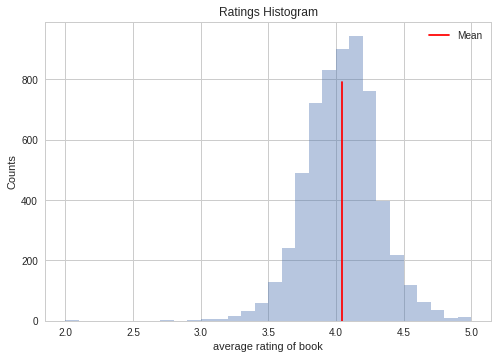

In [16]:
sns.set_context("notebook")
meanrat=book_dataframe.rating.mean()
#you can get means and medians in different ways
print meanrat, np.mean(book_dataframe.rating), book_dataframe.rating.median()
with sns.axes_style("whitegrid"):
    book_dataframe.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.8, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

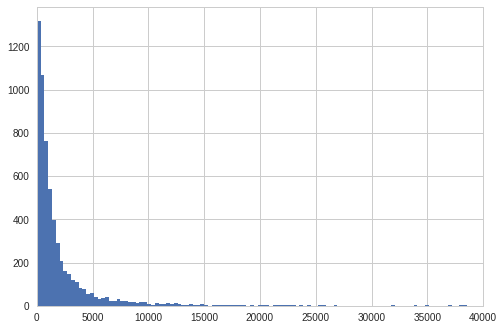

In [21]:
with sns.axes_style('whitegrid'):
    book_dataframe.review_count.hist(bins=400)
    plt.xlim([0, 40000])


#### Scatter plot

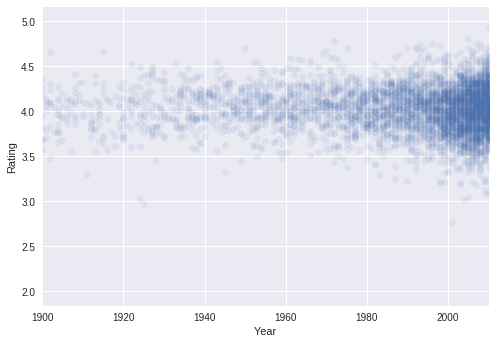

In [23]:
plt.scatter(book_dataframe.year, book_dataframe.rating, lw=0, alpha=.08)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

#### Fill plot

In [24]:

with sns.axes_style('whitegrid'):


IndentationError: expected an indented block (<ipython-input-24-a68c6d7171d9>, line 2)

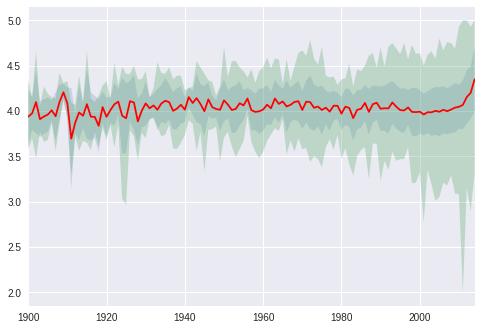

In [76]:
stats = book_dataframe.query("year >= 1900").groupby(['year'])['rating'].agg(['min', 'max', 'mean', 'std'])
plt.fill_between(stats.index, stats['mean'] - stats['std'], stats['mean'] + stats['std'], alpha=0.2)
plt.fill_between(stats.index, stats['min'], stats['max'], alpha=0.3)
plt.plot(stats.index, stats['mean'], 'r')
plt.autoscale(enable=True, axis='x', tight=True)


In [60]:
stats['min']

year
1900    3.58
1901    3.70
1902    3.48
1903    3.77
1904    3.66
1905    3.68
1906    3.87
1907    3.56
1908    3.86
1909    4.13
1910    3.94
1911    3.30
1912    3.72
1913    3.56
1914    3.67
1915    3.65
1916    3.57
1917    3.77
1918    3.61
1919    3.82
1920    3.68
1921    3.85
1922    3.60
1923    3.86
1924    3.03
1925    2.97
1926    3.79
1927    3.72
1928    3.46
1929    3.76
        ... 
1985    3.57
1986    3.60
1987    3.25
1988    3.64
1989    3.64
1990    3.23
1991    3.45
1992    3.35
1993    3.55
1994    3.45
1995    3.47
1996    3.47
1997    3.60
1998    3.20
1999    3.21
2000    3.32
2001    2.77
2002    3.35
2003    3.19
2004    3.01
2005    3.05
2006    3.21
2007    3.18
2008    3.29
2009    3.09
2010    3.08
2011    2.00
2012    3.15
2013    2.90
2014    3.31
Name: min, dtype: float64